#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen y convierte a RGB

(938, 473, 3)


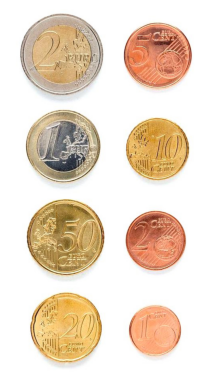

In [3]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

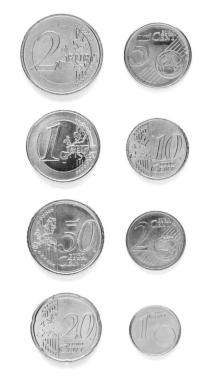

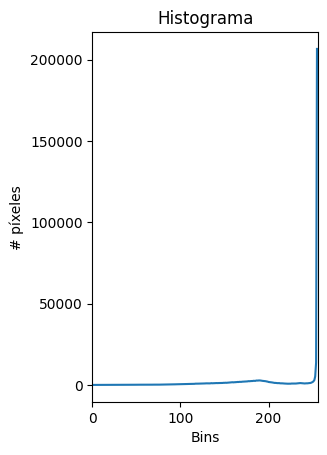

In [4]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

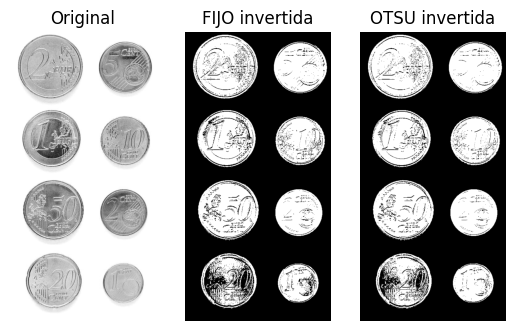

In [5]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu, invertido
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


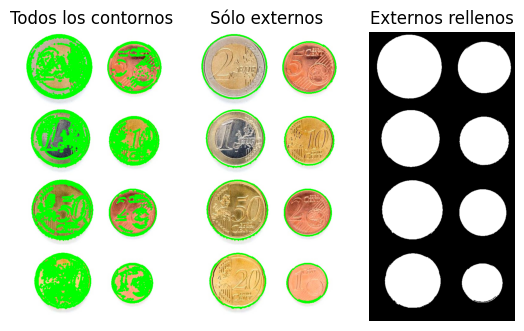

In [6]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

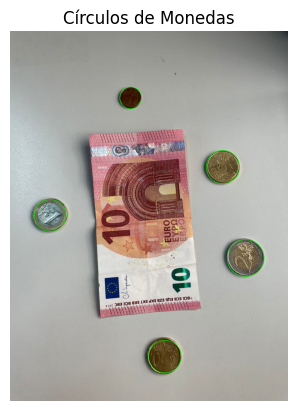

Número total de monedas en la imagen: 5


In [7]:
#Cargamos las imagenes
dinero = cv2.imread('dinero.jpg') 

#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
dinero_rgb = cv2.cvtColor(dinero, cv2.COLOR_BGR2RGB)

#Conversión a gris
gris = cv2.cvtColor(dinero, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        dp=1,
        minDist=100,  # distancia mínima entre círculos
        param1=190, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

if circ is not None:

    circulos = np.uint16(np.around(circ))

    # Inicializamos un contador de monedas
    contador_monedas = 0

    for circulo in circulos[0, :]:
        x, y, radio = circulo

        # Define un ROI (Región de interés) alrededor del círculo
        roi = dinero[y - radio:y + radio, x - radio:x + radio]

        # Calcula la relación de aspecto del ROI
        altura, ancho, _ = roi.shape
        relacion_aspecto = ancho / altura

        # Si la relación de aspecto está cerca de 1 (cercano a un círculo), consideramos que es una moneda
        if 0.9 < relacion_aspecto < 1.1:
            contador_monedas += 1
            cv2.circle(dinero, (x, y), radio, (0, 255, 0), 2)
            
    # Muestra el resultado con los círculos de las monedas
    plt.axis("off")
    plt.imshow(cv2.cvtColor(dinero, cv2.COLOR_BGR2RGB))
    plt.title('Círculos de Monedas')
    plt.show()

    print(f'Número total de monedas en la imagen: {contador_monedas}')
else:
    print('No se encontraron círculos en la imagen.')


Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


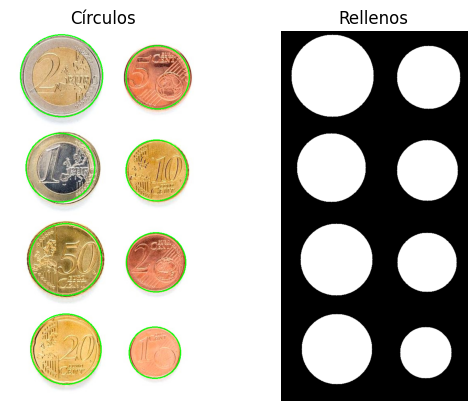

In [8]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




In [9]:
dinero = cv2.imread('solapadas.jpg')
dinero_rgb = cv2.cvtColor(dinero, cv2.COLOR_BGR2RGB)

# Conversión a gris y suavizado de altas frecuencias
gris = cv2.cvtColor(dinero, cv2.COLOR_BGR2GRAY)
pimg = cv2.medianBlur(gris, 7)

# Localizar círculos
circ = cv2.HoughCircles(
        pimg,  
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=100,  
        param1=190, 
        param2=50, 
        minRadius=50,  
        maxRadius=150,  
    )

# Contador de valor de las monedas
total = 0 

# Comprobamos si existen círculos en la imagen
if circ is not None:
    circulos = np.uint16(np.around(circ))

    for circulo in circulos[0, :]:
        x, y, radio = circulo

        # Define un ROI (Región de interés) alrededor del círculo
        roi = dinero[y - radio:y + radio, x - radio:x + radio]

        # Calcula la relación de aspecto del ROI
        altura, ancho, _ = roi.shape
        relacion_aspecto = ancho / altura

        # Consideración de monedas
        if 0.9 < relacion_aspecto < 1.1:
            if 80 < radio < 90:  # Diametro de la moneda de 1e.
                total += 1
                cv2.circle(dinero, (x, y), radio, (0, 255, 0), 2)   #Marcamos la moneda de 1e
            elif 90 < radio < 100:
                total += 0.5
            elif 50 < radio < 70:
                total += 0.01
            elif 100 < radio < 110:
                total += 2
            elif radio == 90:
                total += 0.2
            
dinero_redimensionado = cv2.resize(dinero, (600, 700)) # (dinero, (ancho x alto))

# Muestra el resultado marcando la/las monedas de 1e
cv2.imshow('Calculo de monedas', dinero_redimensionado)

# Función para manejar clics en la imagen resultante
def detectar_clic(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("La cantidad total de las monedas de la imagen:", total)

# Asigna la función de manejo de clics a la ventana
cv2.setMouseCallback('Calculo de monedas', detectar_clic)

cv2.waitKey(0)
cv2.destroyAllWindows()

Clasificación de microplásticos

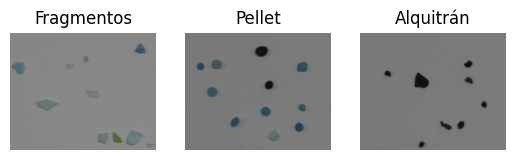

In [10]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

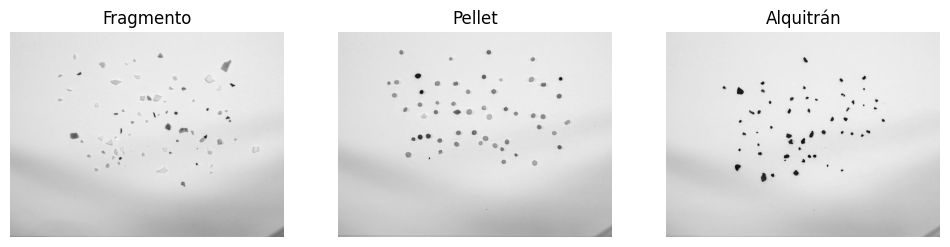

In [14]:

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Se cargan las tres imágenes: fragmentos, pellets y alquitrán
frag = cv2.imread('fragment-03-olympus-10-01-2020.JPG')
pellet = cv2.imread('pellet-03-olympus-10-01-2020.JPG')
alqui = cv2.imread('tar-03-olympus-10-01-2020.JPG')

# Se convierten las imágenes a escala de grises
frag_gris = cv2.cvtColor(frag, cv2.COLOR_BGR2GRAY)
pellet_gris = cv2.cvtColor(pellet, cv2.COLOR_BGR2GRAY)
alqui_grisç = cv2.cvtColor(alqui, cv2.COLOR_BGR2GRAY)

# Se aplica un filtro de suavizado
frag_gris = cv2.GaussianBlur(frag_gris, (25, 25), 0)

# Se muestran las imágenes
plt.figure(figsize=(12, 6))

# Se muestra la imagen: fragmentos
plt.subplot(131)
plt.title('Fragmento')
plt.axis("off")
plt.imshow(frag_gris,cmap='gray') 

# Se muestra la imagen: Pellet
plt.subplot(132)
plt.title('Pellet')
plt.axis("off")
plt.imshow(pellet_gris,cmap='gray') 

# Se muestra la imagen: alquitrán
plt.subplot(133)
plt.title('Alquitrán')
plt.axis("off")
plt.imshow(alqui_grisç,cmap='gray') 

plt.show()

